In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pollution = pd.read_csv('https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/Air%20pollution%20by%20city%20-%20Fouquet%20and%20DPCC%20(2011)/Air%20pollution%20by%20city%20-%20Fouquet%20and%20DPCC%20(2011).csv')

In [3]:
pollution.columns

Index(['Entity', 'Year', 'Smoke (Fouquet and DPCC (2011))',
       'Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))'],
      dtype='object')

In [4]:
pollution = pollution.rename(
    columns = {'Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))': 'SPM',
              'Smoke (Fouquet and DPCC (2011))':'Smoke',
              'Entity':'City'}
)
pollution.dtypes

City      object
Year       int64
Smoke    float64
SPM      float64
dtype: object

In [5]:
pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    331 non-null    object 
 1   Year    331 non-null    int64  
 2   Smoke   301 non-null    float64
 3   SPM     331 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 10.5+ KB


In [6]:
pollution.describe()

,Year,Smoke,SPM
count,331.000000,301.000000,331.000000
mean,1864.154079,210.296440,365.970050
std,94.366037,88.543288,172.512674
min,1700.000000,13.750000,15.000000
25%,1782.500000,168.571429,288.474026
50%,1865.000000,208.214286,375.324675
75%,1947.500000,291.818182,512.609209
max,2016.000000,342.857143,623.376623


In [7]:
pollution.City.unique()

array(['Delhi', 'London'], dtype=object)

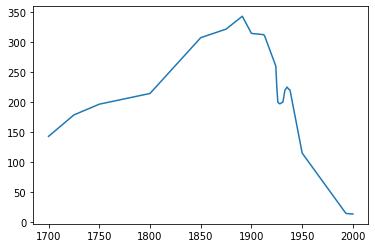

In [8]:
plt.plot(pollution.Year, pollution.Smoke)

In [9]:
#Convert Year collumn from int64 to datetime.
pollution['Year'] = pollution['Year'].apply(
    lambda x: datetime.datetime.strptime(str(x), '%Y'))
pollution.dtypes

City             object
Year     datetime64[ns]
Smoke           float64
SPM             float64
dtype: object

In [10]:
pollution.isnull().mean()

City     0.000000
Year     0.000000
Smoke    0.090634
SPM      0.000000
dtype: float64

(array([35., 14., 15.,  6., 26., 78., 45., 25., 27., 60.]),
 array([ 15.        ,  75.83766234, 136.67532468, 197.51298702,
        258.35064936, 319.1883117 , 380.02597404, 440.86363638,
        501.70129872, 562.53896106, 623.3766234 ]),
 <BarContainer object of 10 artists>)

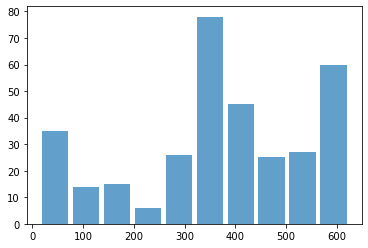

In [11]:
plt.hist(pollution.SPM, bins ='auto', alpha = 0.7, rwidth = 0.85)

## Uncovering relationships between variables

This is important to avoid feature leakage and collinearity

Text(336.9714285714286, 0.5, 'SPM')

<Figure size 864x432 with 0 Axes>

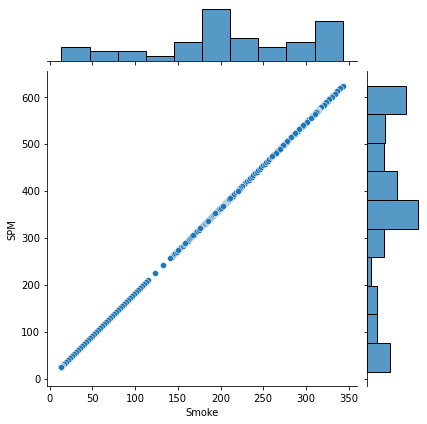

In [12]:
plt.figure(figsize = (12,6))
sns.jointplot(
    x='Smoke', y='SPM',
    edgecolor = 'white',
    data = pollution
)
plt.xlabel('Smoke')
plt.ylabel('SPM')

In the scatter plot, we can see that the two variables are extremmely similar, the values are all on the diagonal. The correlation between these two variables is perfect 1.0, which mean they are in fact identical

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

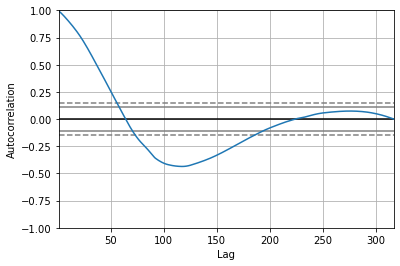

In [13]:
pollution = pollution.pivot('Year', 'City', 'SPM')
pd.plotting.autocorrelation_plot(pollution['London'])

The plot of SPM clearly shows that air pollution is not a stationary process, since the autocorrelation is not flat. We can also test stationarity by Dickey-Fuller test

In [16]:
from statsmodels.tsa import stattools
stattools.adfuller(pollution['London'])

(-0.3372164080424302,
 0.9200654843183895,
 13,
 303,
 {'1%': -3.4521175397304784,
  '5%': -2.8711265007266666,
  '10%': -2.571877823851692},
 1684.699266349387)

The second return value is the p-value, with p-value below 5% we would typically reject the null hypothesis and we could assume that our time-series is stationary.In this case, we can'assume that the series is stationary

In [24]:
from matplotlib.dates import DateFormatter
#The DateFormatter class is a part of the matplotlib.dates module in Matplotlib, which provides functionality for working with dates and times in plotting. DateFormatter is specifically designed to format date and time values for display on the plot axes.
import seaborn as sns
from sklearn.datasets import fetch_openml

In [28]:
eeg = fetch_openml(data_id = 1471, as_frame = True)
# data_id represent the identifier of the dataset, as_frame to true if you want to return the dataset as pandas DataFrame
increment = 117 / len(eeg['data'])
import numpy as np
index = np.linspace(
    start = 0,
    stop = increment*len(eeg['data']),
    num = len(eeg['data'])
    )
ts_index = pd.to_datetime(index, unit='s')
v1 = pd.Series(name = 'V1', data=eeg['data']['V1'].values, index=ts_index)
v1

1970-01-01 00:00:00.000000000    4329.23
1970-01-01 00:00:00.007810935    4324.62
1970-01-01 00:00:00.015621870    4327.69
1970-01-01 00:00:00.023432805    4328.72
1970-01-01 00:00:00.031243741    4326.15
                                  ...   
1970-01-01 00:01:56.968756258    4281.03
1970-01-01 00:01:56.976567194    4276.92
1970-01-01 00:01:56.984378129    4277.44
1970-01-01 00:01:56.992189064    4284.62
1970-01-01 00:01:57.000000000    4287.69
Name: V1, Length: 14980, dtype: float64

In [30]:
slicing = (v1.index >= '1970-01-01 00:00:08') & (v1.index <='1970-01-01 00:01:10.000000000')
v1[slicing]

1970-01-01 00:00:08.006208692    4289.74
1970-01-01 00:00:08.014019627    4284.10
1970-01-01 00:00:08.021830562    4280.00
1970-01-01 00:00:08.029641498    4289.74
1970-01-01 00:00:08.037452433    4298.46
                                  ...   
1970-01-01 00:01:09.962547566    4289.74
1970-01-01 00:01:09.970358501    4283.08
1970-01-01 00:01:09.978169437    4284.62
1970-01-01 00:01:09.985980372    4289.23
1970-01-01 00:01:09.993791307    4290.77
Name: V1, Length: 7937, dtype: float64

Text(0, 0.5, 'voltage')

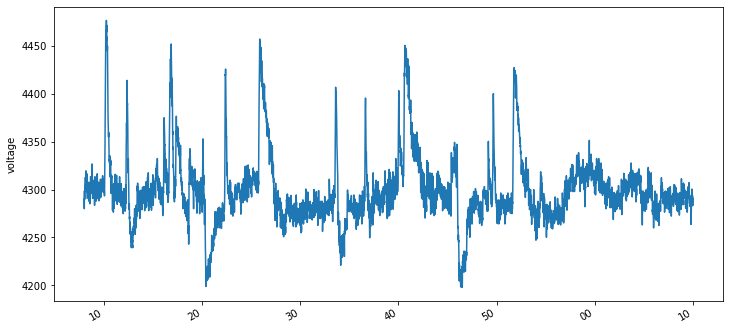

In [31]:
date_formatter = DateFormatter("%S")
ax = v1[slicing].plot(figsize=(12,6))
ax.xaxis.set_major_formatter(date_formatter)
plt.ylabel('voltage')

Text(0.5, 0, 'seconds')

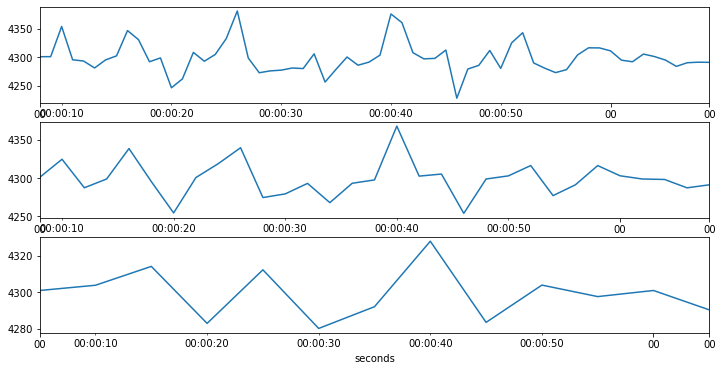

In [32]:
plt.subplot(311)
ax1 = v1[slicing].resample('1s').mean().plot(figsize=(12,6))
ax1.xaxis.set_major_formatter(date_formatter)
plt.subplot(312)
ax1 = v1[slicing].resample('2s').mean().plot(figsize=(12,6))
ax1.xaxis.set_major_formatter(date_formatter)
plt.subplot(313)
ax2 = v1[slicing].resample('5s').mean().plot(figsize=(12,6))
ax2.xaxis.set_major_formatter(date_formatter)
plt.xlabel('seconds')

Text(0, 0.5, 'PSD [V**2/Hz]')

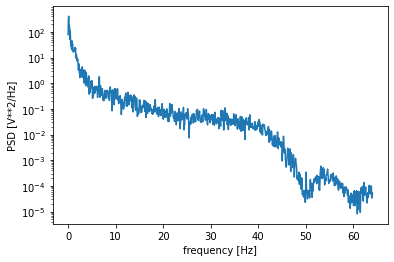

In [35]:
from scipy import signal
fs = len(eeg['data'])/117
f, Pxx_den = signal.welch(
    v1[slicing].values, fs, nperseg = 2048, scaling = 'spectrum')
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')